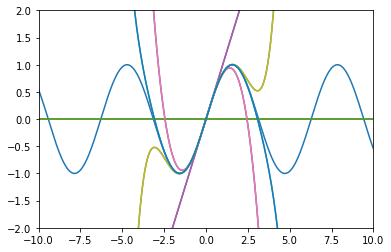

In [13]:
# 練習問題10

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

def sin(x):
    return math.sin(x)

def d0sin(n):
    if(n % 2 == 0):
        return 0
    return (-1)**(n // 2)

def taylorsin(n,x):
    return sum([d0sin(i)*(x**i)/math.factorial(i) for i in range(n)])

def taylorsingraph(n):
    x = np.linspace(-10, 10, 1000)
    plt.axis([-10,10,-2,2.0])
    y = [sin(z) for z in x]
    plt.plot(x, y)
    for i in range(n):
        y = [taylorsin(i, z) for z in x] 
        plt.plot(x, y)
    plt.show()

taylorsingraph(10)

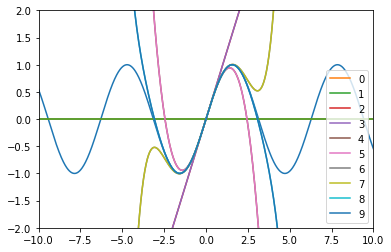

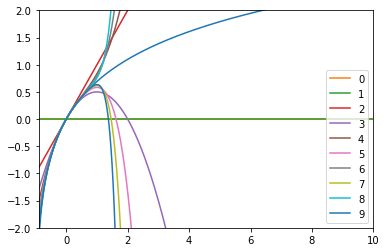

In [14]:
def logp1(x):
    return math.log(x+1)

def d0logp1(n):
    if(n == 0): 
        return 0
    return math.factorial(n-1)*((-1)**(n+1))

def taylor(fun,n,x):
    return sum([fun(i)*(x**i)/math.factorial(i) for i in range(n)])

funs = dict()
funs['sin'] = (sin, d0sin, -10, 10, -2, 2)
funs['logp1'] = (logp1, d0logp1, -0.9, 10, -2, 2)

def taylorgraph(fname,n):
    (f, df, min, max, ymin, ymax) = funs[fname]
    x = np.linspace(min, max, 1000)
    plt.axis([min,max,ymin,ymax])
    y = [f(z) for z in x]
    plt.plot(x, y)
    for i in range(n):
        y = [taylor(df, i, z) for z in x] 
        plt.plot(x, y, label=str(i))
    plt.legend(loc='lower right')
    plt.show()

taylorgraph("sin", 10)
taylorgraph("logp1", 10)

<function matplotlib.pyplot.show>

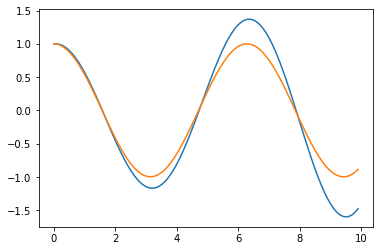

In [3]:
# 練習問題30
%matplotlib inline
import matplotlib.pyplot as plt
import math

t = 0
x = 1
y = 0
delta = 0.1 # この値を変えてみよう
timeline = []
ix = []
iy = []
for n in range(100):
    ix.append(x)
    iy.append(y)
    timeline.append(t)
    x, y = x + y * delta, y - x * delta
    t = t + delta
plt.plot(timeline, ix)

y = [math.cos(t) for t in timeline]
plt.plot(timeline, y)

plt.show

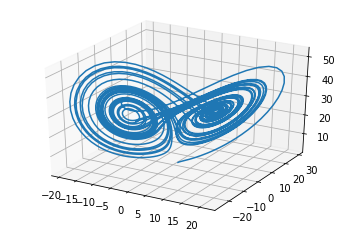

In [4]:
# 練習問題40
%matplotlib inline
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

ax = plt.subplot(111, projection='3d')

p, r, b = 10, 28, 8/3
x, y, z, t = 1, 1, 1, 0 
delta = 0.01
ix, iy, iz = [], [], []

for n in range(4000):
    ix.append(x)
    iy.append(y)
    iz.append(z)
    x, y, z = x + (-p*x + p*y) * delta, \
              y + (-x*z + r*x -y) * delta, \
              z + (x*y - b*z) * delta
ax.plot(ix, iy, iz)

plt.show()

In [42]:
# ルンゲクッタ法，
def rk(f, t, y, h):
    '''ルンゲクッタ法。f に微分方程式，y に現在値，h に時間の差分を与える。
    h 時間後の y の新しい値を返す。 y は，ndarray のベクトル値でも可'''
    k1 = f(t, y)
    k2 = f(t + h/2, y + k1*h/2)
    k3 = f(t + h/2, y + k2*h/2)
    k4 = f(t+h, y + k3*h)
    newy = y + (k1 + 2*k2 + 2*k3 + k4)*h/6
    newt = t + h
#    newy = y + f(t,y)*h
    return newy

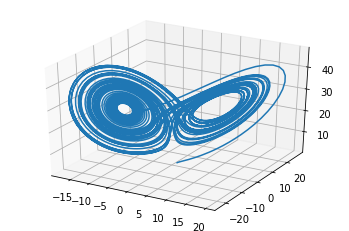

In [41]:
# 練習問題40
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
'''ルンゲクッタ法で，ローレンツ・アトラクタを描画'''
ax = plt.subplot(111, projection='3d')

p, r, b = 10, 28, 8/3
t = 0
v = np.array([1,1,1])
delta = 0.01
def lor(t, v):
    '''微分方程式。v には，ndarray を与え，ndarray を返す'''
    (x,y,z) = (v[0], v[1], v[2])
    return(np.array([(-p*x + p*y), \
              (-x*z + r*x -y), \
              (x*y - b*z)]))

ix, iy, iz = [], [], []

for n in range(5000):
    ix.append(v[0])
    iy.append(v[1])
    iz.append(v[2])
    v = rk(lor, t, v, delta) 
    t = t + delta

ax.plot(ix, iy, iz)

plt.show()